In [1]:
import os
import pandas as pd

base_dir = "../Data"
base_csv_path = os.path.join(base_dir, 'm0_imputed.csv')
output_csv_path = os.path.join(base_dir, 'm0_post_feat_sel_f1.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [2]:
#Print number of missing values in wl_tme
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

#Print number of values in wl_time
print(f'Number of values in wl_time: {df["wl_time"].count()}')

wl_median = df['wl_time'].median()

Number of missing values in wl_time: 0
Number of values in wl_time: 65067


In [3]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df.drop(['wl_time'], axis=1)
y = df['wl_time'].apply(lambda x: 0 if x < wl_median else 1)

In [4]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [col for col in X.columns if X[col].nunique() > 2]
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [5]:
log = LogisticRegression(max_iter=1000)

selector = RFECV(estimator=log, cv=5, scoring='f1', verbose=1)
selector.fit(X, y)

print(f"Num of features: {X.shape[1]}")
print(f"Num of features recommended after feature selection: {selector.n_features_}")

Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 fe

In [6]:
feature_rankings = list(zip(X.columns, selector.ranking_, selector.support_))
feature_rankings_sorted = sorted(feature_rankings, key=lambda x: x[1])

X_new = df[[col for col in df.columns if col in X.columns[selector.support_]]]
df_sel = pd.concat([X_new, df['wl_time']], axis=1)

log.fit(X_new, y)  # Fit to get weight coefficients

for feature, ranking, support in feature_rankings_sorted:
    print(f"Feature: {feature}, Ranking: {ranking}, Support: {support}")

Feature: wgt_kg_tcr, Ranking: 1, Support: True
Feature: hgt_cm_tcr, Ranking: 1, Support: True
Feature: most_rcnt_creat, Ranking: 1, Support: True
Feature: tot_serum_album, Ranking: 1, Support: True
Feature: init_age, Ranking: 1, Support: True
Feature: init_hgt_cm_calc, Ranking: 1, Support: True
Feature: init_wgt_kg_calc, Ranking: 1, Support: True
Feature: thoracic_dgn_1.0, Ranking: 1, Support: True
Feature: thoracic_dgn_2.0, Ranking: 1, Support: True
Feature: thoracic_dgn_5.0, Ranking: 1, Support: True
Feature: thoracic_dgn_7.0, Ranking: 1, Support: True
Feature: thoracic_dgn_missing, Ranking: 1, Support: True
Feature: num_prev_tx_0, Ranking: 1, Support: True
Feature: num_prev_tx_1, Ranking: 1, Support: True
Feature: num_prev_tx_2, Ranking: 1, Support: True
Feature: num_prev_tx_3, Ranking: 1, Support: True
Feature: tah_Y, Ranking: 1, Support: True
Feature: tah_missing, Ranking: 1, Support: True
Feature: vas_N, Ranking: 1, Support: True
Feature: vas_missing, Ranking: 1, Support: True
Fe

/home/maliti/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#Print the weights of the model with the corresponding feature name
weights = list(zip(X_new.columns, log.coef_[0]))
weights_sorted = sorted(weights, key=lambda x: x[1])
for feature, weight in weights_sorted:
    print(f"Feature: {feature}, Weight: {weight}")

Feature: init_stat_1.0, Weight: -0.9783706574322725
Feature: abo_3, Weight: -0.8182238820270825
Feature: inotropic_missing, Weight: -0.7048981133841475
Feature: vas_N, Weight: -0.6544795137375932
Feature: prior_card_surg_tcr_missing, Weight: -0.643392729211034
Feature: ecmo_tcr_1, Weight: -0.38865945940892105
Feature: thoracic_dgn_7.0, Weight: -0.3773488536593007
Feature: func_stat_tcr_missing, Weight: -0.37562391441083387
Feature: onvent_Y, Weight: -0.3719921778351641
Feature: inotropes_tcr_1, Weight: -0.349376717870665
Feature: ventilator_tcr_0, Weight: -0.3149887809581497
Feature: icu_missing, Weight: -0.31376425014239206
Feature: diab_2.0, Weight: -0.2843527168004195
Feature: dial_ty_tcr_1.0, Weight: -0.2809204986963192
Feature: iabp_tcr_1, Weight: -0.2735309819885647
Feature: func_stat_tcr_3.0, Weight: -0.2728394748853019
Feature: malig_tcr_N, Weight: -0.2470206655042477
Feature: diab_missing, Weight: -0.24479158022783903
Feature: cig_use_N, Weight: -0.24201501367461342
Feature: n

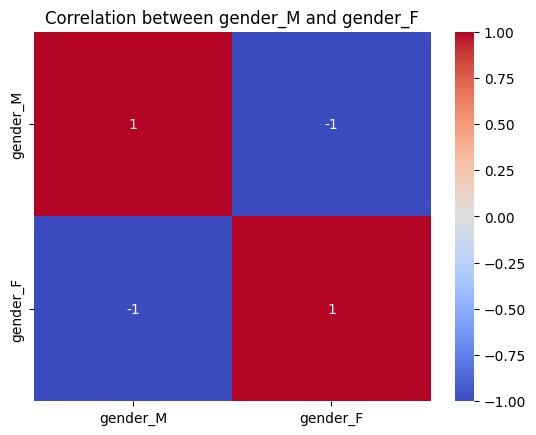

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gender_M' and 'gender_F' are columns in df
correlation = df[['gender_M', 'gender_F']].corr()

# Create a heatmap using seaborn
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation between gender_M and gender_F')
plt.show()


In [8]:
df_sel.to_csv(output_csv_path, index=False)